In [1]:
import tensorflow as tf

In [2]:
print (tf.__version__)

1.13.1


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(x_train, y_train),( x_test, y_test ) = mnist.load_data()


In [5]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train/255.0
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test/255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( 64, (3,3), activation='relu', input_shape=(28,28,1) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D( 64, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
#     aumentando!
    tf.keras.layers.Conv2D( 64, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [9]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={} ):
        if ( logs.get('acc') > 0.99 ):
            print ("\nAlcanzado un 99 % de precision del entrenamiento")
            self.model.stop_training = True
        elif ( logs.get('acc') > 0.97 ):
            print ("\nAlcanzado un 97 % de precision del entrenamiento")
            self.model.stop_training = True
        elif ( logs.get('acc') > 0.96 ):
            print ("\nAlcanzado un 96 % de precision del entrenamiento")
            self.model.stop_training = True
        elif ( logs.get('acc') > 0.95 ):
            print ("\nAlcanzado un 95 % de precision del entrenamiento")
            self.model.stop_training = True
        elif ( logs.get('acc') > 0.94 ):
            print ("\nAlcanzado un 94 % de precision del entrenamiento")
            self.model.stop_training = True
        elif ( logs.get('acc') > 0.93 ):
            print ("\nAlcanzado un 93 % de precision del entrenamiento")
            self.model.stop_training = True
callbacks = myCallBack()

In [10]:
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.5692 - acc: 0.7900
Epoch 2/10
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.3852 - acc: 0.8594
Epoch 3/10
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.3331 - acc: 0.8767
Epoch 4/10
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.3007 - acc: 0.8884
Epoch 5/10
60000/60000 [==============================] - 135s 2ms/sample - loss: 0.2751 - acc: 0.8978
Epoch 6/10
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.2518 - acc: 0.9064
Epoch 7/10
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.2353 - acc: 0.9124
Epoch 8/10
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.2184 - acc: 0.9185
Epoch 9/10
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.2046 - acc: 0.9226
Epoch 10/10
60000/60000 [==============================] - 127s 2ms/sampl

In [11]:
test_loss = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 6s 579us/sample - loss: 0.3256 - acc: 0.8934


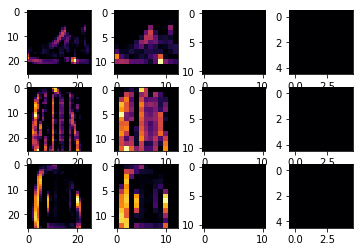

In [13]:
import matplotlib.pyplot as plt
f , axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model( inputs = model.input, outputs = layer_outputs )
for x in range (0,4):
    f1 = activation_model.predict( x_test[FIRST_IMAGE].reshape(1,28,28,1) )[x]
    axarr[0,x].imshow( f1[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[0,x].grid(False)
    f2 = activation_model.predict( x_test[SECOND_IMAGE].reshape(1,28,28,1) )[x]
    axarr[1,x].imshow( f2[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[1,x].grid(False)
    f3 = activation_model.predict( x_test[THIRD_IMAGE].reshape(1,28,28,1) )[x]
    axarr[2,x].imshow( f3[0, : , : ,CONVOLUTION_NUMBER], cmap='inferno' )
    axarr[2,x].grid(False)